# Modelo RANDOM FOREST

In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import os

In [2]:
ruta_carpeta_actual = os.getcwd()
ruta_carpeta_raiz = os.path.dirname(ruta_carpeta_actual)
csv_path  = os.path.join(ruta_carpeta_raiz, "dataset", "PuntosMuestra_CR_2023.csv")
df = pd.read_csv(csv_path)
# c:\Users\Fran\Documents\2025-2_Seminario2\Uso-de-Inteligencia-Artificial-Geoespacial-para-Clasificar-Coberturas-Terrestres-en-Costa-Rica\dataset\PuntosMuestra_CR_2023.csv

## Limpieza

In [3]:
# Quitar valores de la CATEGORIA = 2
df_filtrado = df[df["CATEGORIA"] != 2]

y = df_filtrado["CATEGORIA"]
X = df_filtrado.drop(columns=["CATEGORIA", "lon", "lat", "year"])

## Definir modelo

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

## Entrenamiento y medir su tiempo

In [5]:
t0_fit = time.perf_counter()
rf.fit(X_train, y_train)
t1_fit = time.perf_counter()

t0_pred = time.perf_counter()
y_pred = rf.predict(X_test)
t1_pred = time.perf_counter()

train_time_s = t1_fit - t0_fit
pred_time_s  = t1_pred - t0_pred
pred_ms_per_sample = (pred_time_s / len(y_test)) * 1000


## Prueba y Resultados

In [6]:
oa   = accuracy_score(y_test, y_pred)
f1m  = f1_score(y_test, y_pred, average="macro")
cm   = confusion_matrix(y_test, y_pred, labels=np.sort(y.unique()))
cm_row_percentage = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100
cm_row_percentage = np.nan_to_num(cm_row_percentage)  # handle division by zero

print("=== RANDOM FOREST ===")
print(f"Instancias: total={len(y_train) + len(y_test)}, train={len(y_train)}, test={len(y_test)}")
print(f"Tiempo entrenamiento: {train_time_s:.2f} s")
print(f"Tiempo inferencia total: {pred_time_s:.3f} s  "
      f"({pred_ms_per_sample:.3f} ms/muestra)")
print(f"OA (accuracy): {oa:.3f}")
print(f"F1-macro: {f1m:.3f}")
print("Etiquetas (orden en matriz):", np.sort(y.unique()).tolist())
print("Matriz de confusión:\n", cm)
print("Matriz de confusión porcentajes:\n", cm_row_percentage)

=== RANDOM FOREST ===
Instancias: total=29199, train=20439, test=8760
Tiempo entrenamiento: 0.95 s
Tiempo inferencia total: 0.072 s  (0.008 ms/muestra)
OA (accuracy): 0.883
F1-macro: 0.816
Etiquetas (orden en matriz): [1, 3, 4, 6, 7, 10]
Matriz de confusión:
 [[2225  226    1    2    0    5]
 [ 170 4267    3    5   10  113]
 [   8    1  317   10    0    0]
 [   4   13   10  258   31   38]
 [  27   53    0   11  259   62]
 [  25  143    0   18   39  406]]
Matriz de confusión porcentajes:
 [[9.04839366e+01 9.19072794e+00 4.06669378e-02 8.13338756e-02
  0.00000000e+00 2.03334689e-01]
 [3.72154116e+00 9.34106830e+01 6.56742557e-02 1.09457093e-01
  2.18914186e-01 2.47373030e+00]
 [2.38095238e+00 2.97619048e-01 9.43452381e+01 2.97619048e+00
  0.00000000e+00 0.00000000e+00]
 [1.12994350e+00 3.67231638e+00 2.82485876e+00 7.28813559e+01
  8.75706215e+00 1.07344633e+01]
 [6.55339806e+00 1.28640777e+01 0.00000000e+00 2.66990291e+00
  6.28640777e+01 1.50485437e+01]
 [3.96196513e+00 2.26624406e+01 

### Matriz de confusion

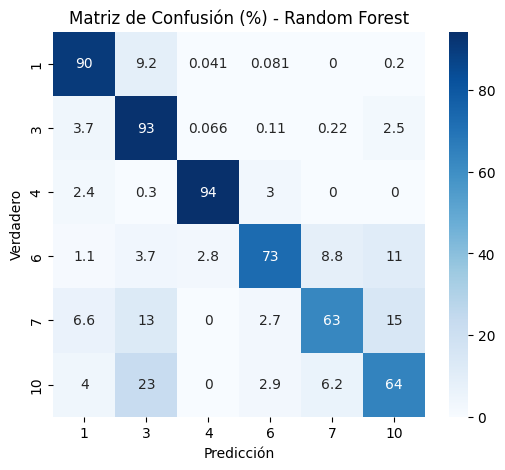

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- calcular matriz de confusión con los últimos resultados ---
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))

plt.figure(figsize=(6,5))
sns.heatmap(cm_row_percentage, annot=True, cmap="Blues",
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión (%) - Random Forest")
plt.show()


# Registrar informacion

In [8]:
import sys
sys.path.append("..")
import importlib, utils_log
importlib.reload(utils_log)
from utils_log import log_row

carpeta_actual = ruta_carpeta_actual.split("\\")[-1]
dataset_utilizado = csv_path.split("\\")[-1]

log_row(
  script="20250901_PruebasEntrenamientoRF.ipynb",
  algoritmo="RandomForest",
  dataset=dataset_utilizado,
  clases_removidas=[2],
  seed=42,
  n_train=len(y_train), n_test=len(y_test),
  n_features=X.shape[1], num_classes=len(sorted(y.unique())),
  fit_seconds=train_time_s,                     # tiempo de rf.fit(...)
  pred_seconds=pred_time_s,                   # tiempo de rf.predict(...)
  ms_per_sample=(pred_time_s/len(y_test))*1000,
  OA=oa, F1_macro=f1m,
  carpeta=carpeta_actual
)